In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6) #change the size of fig drawn (width=10,ht=6)


In [2]:
train = pd.read_csv("pred_train.csv")
test = pd.read_csv("pred_test.csv")

In [3]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [4]:
train.describe()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,108129.000000,108129,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,36726.228833,0.00298717,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,971902.705156,0.0545736,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,0.010000,False,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2000.000000,0,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5000.000000,0,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,13000.000000,0,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,100000000.000000,True,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 11.7+ MB


In [6]:
train = train.drop(['name','desc','keywords'],axis=1)      # These columns are not useful for our purposes


In [7]:
train.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,300,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,30,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,500,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,2000,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [8]:
train['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'NZ', 'NL', 'SE', 'IE', 'NO', 'DK', 'DE'],
      dtype=object)

In [9]:
train['currency'].unique()

array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK'],
      dtype=object)

In [10]:
train = train.drop(['project_id'],axis=1)      # These columns are not useful for our purposes


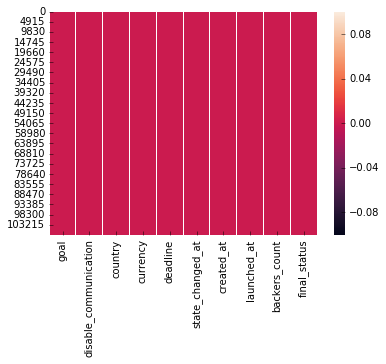

In [11]:
sns.heatmap(train.isnull())

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108129 entries, 0 to 108128
Data columns (total 10 columns):
goal                     108129 non-null float64
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 8.4+ MB


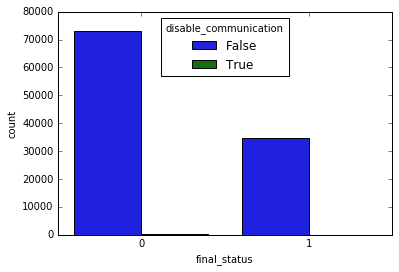

In [13]:
sns.countplot(x='final_status', hue='disable_communication',data=train)

In [14]:
train['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [15]:
import datetime
def deadlines(s):
    a = str(s)
    return (
      datetime.datetime.fromtimestamp(
          int(a)
       ).strftime('%Y-%m-%d %H:%M:%S')
     )


In [16]:
print(train['state_changed_at']-train['deadline'])

0              18
1            3018
2             258
3             381
4             437
5             619
6              28
7              22
8              22
9              92
10            561
11             28
12            319
13             31
14            260
15             89
16            271
17            801
18             54
19             40
20             52
21            512
22            169
23             28
24            511
25             93
26            320
27            324
28            449
29             37
           ...   
108099          1
108100          1
108101          1
108102          3
108103          4
108104          1
108105          2
108106          3
108107          2
108108   -1735623
108109          4
108110          4
108111          3
108112          3
108113          2
108114          3
108115          3
108116          2
108117          3
108118          2
108119          4
108120          2
108121         51
108122         12
108123    

In [17]:
print(train['launched_at']-train['created_at'])

0             2216
1            15368
2              785
3             2935
4             2627
5           413669
6            11136
7             9750
8            65737
9             5303
10          226718
11            5744
12            5358
13            4711
14          261158
15            7884
16          162989
17            8369
18           88559
19          344154
20            2669
21            1764
22          104853
23            3904
24          114145
25           72505
26           12467
27           10414
28          181521
29            4189
            ...   
108099     1554220
108100     1214495
108101     4541198
108102      685530
108103      557556
108104      459107
108105    26510245
108106     3359550
108107       70493
108108        1855
108109      565075
108110      237951
108111       92617
108112    32448711
108113        9181
108114        1603
108115       76856
108116     1367665
108117      776121
108118        2731
108119    60755467
108120      

In [18]:
train['dead_diff'] = (train['state_changed_at']-train['deadline'])

In [19]:
print("The skewness of deadline is {}".format(train['dead_diff'].skew()))

The skewness of deadline is -5.06094459543


In [20]:
train['deploy_diff'] = (train['launched_at']-train['created_at'])

In [21]:
print("The skewness of deployment is {}".format(train['deploy_diff'].skew()))

The skewness of deployment is 5.91217874854


In [22]:
#non-numeric features

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,disable_communication
count,108129
mean,0.00298717
std,0.0545736
min,False
25%,0
50%,0
75%,0
max,True


('Skew is:', -5.060944595425974)


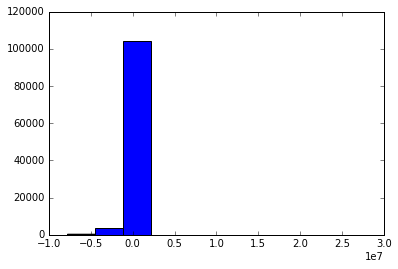

In [23]:
#Skewed Distribution
print("Skew is:", train.dead_diff.skew())
plt.hist(train.dead_diff, color = 'blue')
plt.show()

('Skew is:', 5.912178748538801)


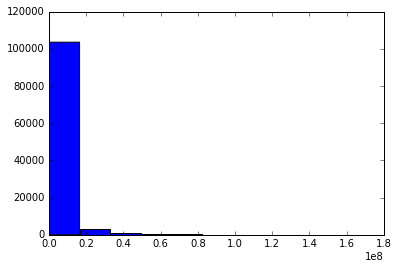

In [24]:
#Skewed Distribution
print("Skew is:", train.deploy_diff.skew())
plt.hist(train.deploy_diff, color = 'blue')
plt.show()

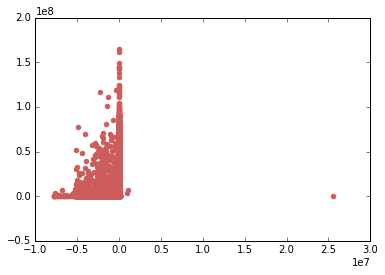

In [25]:
plt.scatter(x=train['dead_diff'],y=train['deploy_diff'],color='indianred')

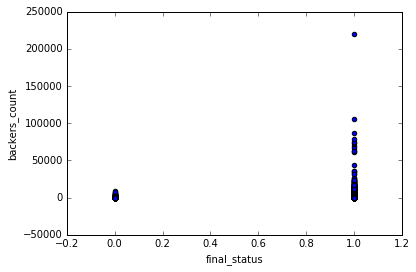

In [26]:
train.plot.scatter(x='final_status',y='backers_count')

In [27]:
train['backers_count'].mean()

123.51666065532835

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [29]:
test.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


In [30]:
test.columns

Index([u'project_id', u'name', u'desc', u'goal', u'keywords',
       u'disable_communication', u'country', u'currency', u'deadline',
       u'state_changed_at', u'created_at', u'launched_at'],
      dtype='object')

In [31]:
test.describe()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at
count,63465.000000,63465,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04
mean,35323.719263,0.00545182,1.459009e+09,1.458278e+09,1.451771e+09,1.456135e+09
std,1206678.060661,0.0736355,1.638850e+07,1.571211e+07,1.983827e+07,1.641921e+07
min,1.000000,False,1.433117e+09,1.428069e+09,1.266343e+09,1.427940e+09
25%,2000.000000,0,1.444522e+09,1.444419e+09,1.438098e+09,1.441756e+09
50%,6000.000000,0,1.458415e+09,1.458254e+09,1.452243e+09,1.455635e+09
75%,20000.000000,0,1.472587e+09,1.470672e+09,1.466366e+09,1.469650e+09
max,100000000.000000,True,1.490916e+09,1.490915e+09,1.490228e+09,1.490297e+09


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63465 entries, 0 to 63464
Data columns (total 12 columns):
project_id               63465 non-null object
name                     63465 non-null object
desc                     63461 non-null object
goal                     63465 non-null float64
keywords                 63465 non-null object
disable_communication    63465 non-null bool
country                  63465 non-null object
currency                 63465 non-null object
deadline                 63465 non-null int64
state_changed_at         63465 non-null int64
created_at               63465 non-null int64
launched_at              63465 non-null int64
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 5.9+ MB


In [33]:
X_train = train[['deadline','state_changed_at','created_at','launched_at','goal']]
Y_train = train['final_status']

X_test = test[['deadline','state_changed_at','created_at','launched_at','goal']]

#index
idx = test['project_id']

X_train.shape , Y_train.shape ,X_test.shape, idx.shape

((108129, 5), (108129,), (63465, 5), (63465,))

In [34]:
model = LogisticRegression()
# Train the model using the training sets and check score
model.fit(X_train, Y_train)
val=model.score(X_train, Y_train)
#Equation coefficient and Intercept
print('training score is : \n',val)
#Predict Output
pred= model.predict(X_test)
print(pred)

('training score is : \n', 0.6800488305634936)
[0 0 0 ... 0 0 0]


In [35]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

score_val = rf.score(X_train,Y_train)

print("Training score is :",score_val)

out_rf = rf.predict(X_test)
print(out_rf)

('Training score is :', 0.9999907517872171)
[0 0 0 ... 0 0 0]


In [36]:
submission = pd.DataFrame({"project_id":idx,"final_status":out_rf})

submission.to_csv('sub_success.csv',index=False)

In [37]:
submiss = pd.DataFrame()
submiss['project_id'] = idx

In [45]:
submiss['final_status'] = pred
submiss.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0


In [39]:
submiss[['project_id','final_status']]

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0
5,kkst994744324,0
6,kkst366471810,0
7,kkst1686645245,1
8,kkst1009612119,0
9,kkst774947236,0


In [40]:
submission.to_csv('successarycheck.csv',index=False)

In [46]:
submiss.columns

Index([u'project_id', u'final_status'], dtype='object')

In [47]:
submiss.to_csv('check_pb.csv',index=False)

In [44]:
su = pd.DataFrame({"project_id":idx,"final_status":pred})

su.to_csv('pb_op.csv',index=False)